# Evaluating Logistic Regression Models - Lab

## Introduction

In regression, you are predicting continuous values so it makes sense to discuss error as a distance of how far off our estimates were. When classifying a binary variable, however, a model is either correct or incorrect. As a result, we tend to quantify this in terms of how many false positives versus false negatives we come across. In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this lab, you'll review precision, recall, accuracy, and F1 score in order to evaluate our logistic regression models.


## Objectives 

In this lab you will: 

- Implement evaluation metrics from scratch using Python 



## Terminology review  

Let's take a moment and review some classification evaluation metrics:  


$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$    

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$  
  
$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

$$ \text{F1 score} = 2 * \frac{\text{Precision * Recall}}{\text{Precision + Recall}} $$


At times, it may be best to tune a classification algorithm to optimize against precision or recall rather than overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is preferable to optimize for recall, the number of cancer positive cases, than it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## Split the data into training and test sets

In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Split the data first into `X` and `y`, and then into training and test sets. Assign 25% to the test set and set the `random_state` to 0. 

In [2]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Load dataset (assuming it's already loaded in a DataFrame `df`)
# Define X and y
y = df['target']  # Replace 'target' with the name of the target column in your dataset
X = df.drop(columns=['target'])  # Drop the target column to get the feature matrix

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Print the shapes of the resulting datasets to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (227, 13)
X_test shape: (76, 13)
y_train shape: (227,)
y_test shape: (76,)


## Build a vanilla logistic regression model

- Import and instantiate `LogisticRegression` 
- Make sure you do not use an intercept term and use the `'liblinear'` solver 
- Fit the model to training data

In [3]:
# Import necessary library
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression without an intercept and using the 'liblinear' solver
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

# Fit the model to the training data
model_log = logreg.fit(X_train, y_train)

# Display the fitted model
model_log


LogisticRegression(fit_intercept=False, solver='liblinear')

## Write a function to calculate the precision

In [5]:
def precision(y, y_hat):
    """
    Calculate precision for binary classification.

    Parameters:
    y (list or array): True labels
    y_hat (list or array): Predicted labels

    Returns:
    float: Precision score
    """
    # Initialize counts
    TP = FP = 0
    
    # Calculate TP and FP
    for true, pred in zip(y, y_hat):
        if pred == 1:
            if true == 1:
                TP += 1
            elif true == 0:
                FP += 1
    
    # Avoid division by zero
    if TP + FP == 0:
        return 0.0
    
    # Calculate precision
    return TP / (TP + FP)



print(precision(y, y_hat))  # Example precision score


1.0


## Write a function to calculate the recall

In [7]:
def recall(y, y_hat):
    """
    Calculate recall for binary classification.

    Parameters:
    y (list or array): True labels
    y_hat (list or array): Predicted labels

    Returns:
    float: Recall score
    """
    # Initialize counts
    TP = FN = 0
    
    # Calculate TP and FN
    for true, pred in zip(y, y_hat):
        if true == 1:
            if pred == 1:
                TP += 1
            elif pred == 0:
                FN += 1
    
    # Avoid division by zero
    if TP + FN == 0:
        return 0.0
    
    # Calculate recall
    return TP / (TP + FN)



print(recall(y, y_hat))  # Example recall score


0.8


## Write a function to calculate the accuracy

In [8]:
def accuracy(y, y_hat):
    """
    Calculate accuracy for binary classification.

    Parameters:
    y (list or array): True labels
    y_hat (list or array): Predicted labels

    Returns:
    float: Accuracy score
    """
    # Initialize count for correct predictions
    correct = 0

    # Calculate correct predictions
    for true, pred in zip(y, y_hat):
        if true == pred:
            correct += 1
    
    # Calculate accuracy
    return correct / len(y)



print(accuracy(y, y_hat))  # Example accuracy score


0.875


## Write a function to calculate the F1 score

In [9]:
def f1_score(y, y_hat):
    """
    Calculate the F1-score for binary classification.

    Parameters:
    y (list or array): True labels
    y_hat (list or array): Predicted labels

    Returns:
    float: F1-score
    """
    # Initialize counts
    TP = FP = FN = 0

    # Calculate TP, FP, and FN
    for true, pred in zip(y, y_hat):
        if true == 1 and pred == 1:
            TP += 1
        elif true == 0 and pred == 1:
            FP += 1
        elif true == 1 and pred == 0:
            FN += 1
    
    # Avoid division by zero for precision and recall
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    # Avoid division by zero for F1-score
    if precision + recall == 0:
        return 0.0
    
    # Calculate F1-score
    return 2 * (precision * recall) / (precision + recall)



print(f1_score(y, y_hat))  # Example F1-score


0.888888888888889


## Calculate the precision, recall, accuracy, and F1 score of your classifier 

Do this for both the training and test sets. 

In [10]:
# Predict the labels for training and test sets
y_hat_train = model_log.predict(X_train)
y_hat_test = model_log.predict(X_test)

# Calculate metrics for training set
train_precision = precision(y_train, y_hat_train)
train_recall = recall(y_train, y_hat_train)
train_accuracy = accuracy(y_train, y_hat_train)
train_f1_score = f1_score(y_train, y_hat_train)

# Calculate metrics for test set
test_precision = precision(y_test, y_hat_test)
test_recall = recall(y_test, y_hat_test)
test_accuracy = accuracy(y_test, y_hat_test)
test_f1_score = f1_score(y_test, y_hat_test)

# Print results
print("Training Set Metrics:")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1_score:.4f}\n")

print("Test Set Metrics:")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1_score:.4f}")


Training Set Metrics:
Precision: 0.8346
Recall: 0.9098
Accuracy: 0.8546
F1 Score: 0.8706

Test Set Metrics:
Precision: 0.8125
Recall: 0.9070
Accuracy: 0.8289
F1 Score: 0.8571


Great job! Now it's time to check your work with `sklearn`. 

## Calculate metrics with `sklearn`

Each of the metrics we calculated above is also available inside the `sklearn.metrics` module.  

In the cell below, import the following functions:

* `precision_score`
* `recall_score`
* `accuracy_score`
* `f1_score`

Compare the results of your performance metrics functions above with the `sklearn` functions. Calculate these values for both your train and test set. 

In [11]:
# Import metrics from sklearn
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Calculate sklearn metrics for the training set
sklearn_train_precision = precision_score(y_train, y_hat_train)
sklearn_train_recall = recall_score(y_train, y_hat_train)
sklearn_train_accuracy = accuracy_score(y_train, y_hat_train)
sklearn_train_f1_score = f1_score(y_train, y_hat_train)

# Calculate sklearn metrics for the test set
sklearn_test_precision = precision_score(y_test, y_hat_test)
sklearn_test_recall = recall_score(y_test, y_hat_test)
sklearn_test_accuracy = accuracy_score(y_test, y_hat_test)
sklearn_test_f1_score = f1_score(y_test, y_hat_test)

# Print sklearn results
print("Sklearn Training Set Metrics:")
print(f"Precision: {sklearn_train_precision:.4f}")
print(f"Recall: {sklearn_train_recall:.4f}")
print(f"Accuracy: {sklearn_train_accuracy:.4f}")
print(f"F1 Score: {sklearn_train_f1_score:.4f}\n")

print("Sklearn Test Set Metrics:")
print(f"Precision: {sklearn_test_precision:.4f}")
print(f"Recall: {sklearn_test_recall:.4f}")
print(f"Accuracy: {sklearn_test_accuracy:.4f}")
print(f"F1 Score: {sklearn_test_f1_score:.4f}\n")

# Comparison with custom functions
print("Comparison of Training Metrics:")
print(f"Custom Precision: {train_precision:.4f} | Sklearn Precision: {sklearn_train_precision:.4f}")
print(f"Custom Recall: {train_recall:.4f}     | Sklearn Recall: {sklearn_train_recall:.4f}")
print(f"Custom Accuracy: {train_accuracy:.4f} | Sklearn Accuracy: {sklearn_train_accuracy:.4f}")
print(f"Custom F1 Score: {train_f1_score:.4f} | Sklearn F1 Score: {sklearn_train_f1_score:.4f}\n")

print("Comparison of Test Metrics:")
print(f"Custom Precision: {test_precision:.4f} | Sklearn Precision: {sklearn_test_precision:.4f}")
print(f"Custom Recall: {test_recall:.4f}     | Sklearn Recall: {sklearn_test_recall:.4f}")
print(f"Custom Accuracy: {test_accuracy:.4f} | Sklearn Accuracy: {sklearn_test_accuracy:.4f}")
print(f"Custom F1 Score: {test_f1_score:.4f} | Sklearn F1 Score: {sklearn_test_f1_score:.4f}")


Sklearn Training Set Metrics:
Precision: 0.8346
Recall: 0.9098
Accuracy: 0.8546
F1 Score: 0.8706

Sklearn Test Set Metrics:
Precision: 0.8125
Recall: 0.9070
Accuracy: 0.8289
F1 Score: 0.8571

Comparison of Training Metrics:
Custom Precision: 0.8346 | Sklearn Precision: 0.8346
Custom Recall: 0.9098     | Sklearn Recall: 0.9098
Custom Accuracy: 0.8546 | Sklearn Accuracy: 0.8546
Custom F1 Score: 0.8706 | Sklearn F1 Score: 0.8706

Comparison of Test Metrics:
Custom Precision: 0.8125 | Sklearn Precision: 0.8125
Custom Recall: 0.9070     | Sklearn Recall: 0.9070
Custom Accuracy: 0.8289 | Sklearn Accuracy: 0.8289
Custom F1 Score: 0.8571 | Sklearn F1 Score: 0.8571


Nicely done! Did the results from `sklearn` match that of your own? 

## Compare precision, recall, accuracy, and F1 score for train vs test sets

Calculate and then plot the precision, recall, accuracy, and F1 score for the test and training splits using different training set sizes. What do you notice?

c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


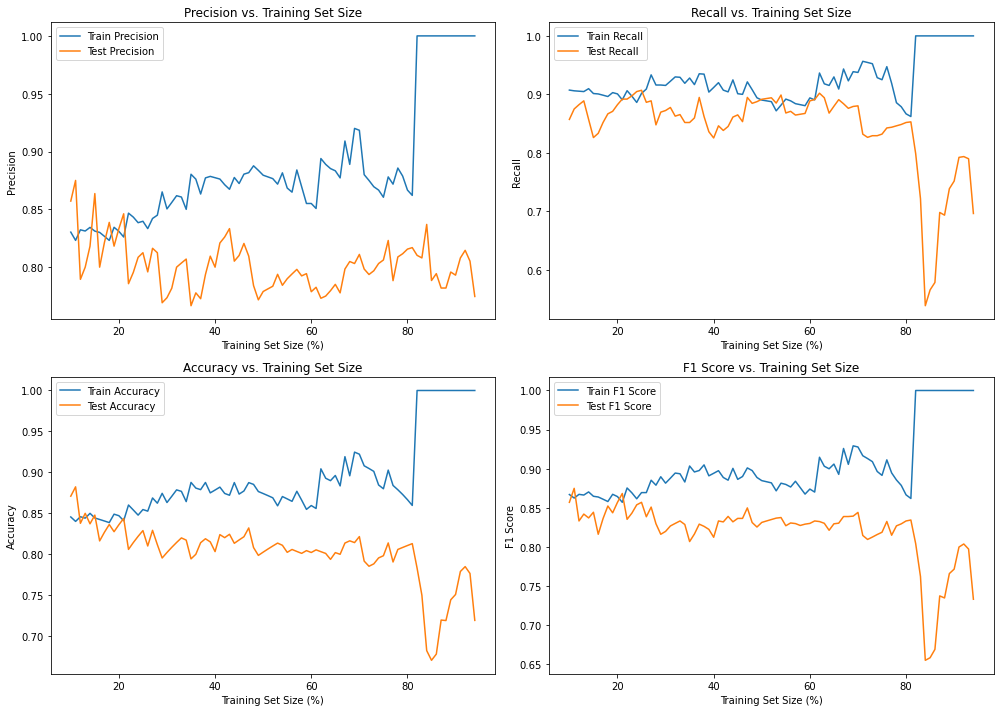

In [19]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Initialize lists to store metrics
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

# Iterate over different training set sizes (varying test size)
for i in range(10, 95):  # Percentage of the dataset to be used for testing
    test_size = i / 100  # Convert percentage to fraction
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    
    # Fit logistic regression model
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    
    # Predict for both train and test sets
    y_hat_train = logreg.predict(X_train)
    y_hat_test = logreg.predict(X_test)
    
    # Calculate and store metrics
    training_precision.append(precision_score(y_train, y_hat_train))
    testing_precision.append(precision_score(y_test, y_hat_test))
    
    training_recall.append(recall_score(y_train, y_hat_train))
    testing_recall.append(recall_score(y_test, y_hat_test))
    
    training_accuracy.append(accuracy_score(y_train, y_hat_train))
    testing_accuracy.append(accuracy_score(y_test, y_hat_test))
    
    training_f1.append(f1_score(y_train, y_hat_train))
    testing_f1.append(f1_score(y_test, y_hat_test))

# Plot the metrics
plt.figure(figsize=(14, 10))

# Plot Precision
plt.subplot(2, 2, 1)
plt.plot(range(10, 95), training_precision, label="Train Precision")
plt.plot(range(10, 95), testing_precision, label="Test Precision")
plt.title("Precision vs. Training Set Size")
plt.xlabel("Training Set Size (%)")
plt.ylabel("Precision")
plt.legend()

# Plot Recall
plt.subplot(2, 2, 2)
plt.plot(range(10, 95), training_recall, label="Train Recall")
plt.plot(range(10, 95), testing_recall, label="Test Recall")
plt.title("Recall vs. Training Set Size")
plt.xlabel("Training Set Size (%)")
plt.ylabel("Recall")
plt.legend()

# Plot Accuracy
plt.subplot(2, 2, 3)
plt.plot(range(10, 95), training_accuracy, label="Train Accuracy")
plt.plot(range(10, 95), testing_accuracy, label="Test Accuracy")
plt.title("Accuracy vs. Training Set Size")
plt.xlabel("Training Set Size (%)")
plt.ylabel("Accuracy")
plt.legend()

# Plot F1 Score
plt.subplot(2, 2, 4)
plt.plot(range(10, 95), training_f1, label="Train F1 Score")
plt.plot(range(10, 95), testing_f1, label="Test F1 Score")
plt.title("F1 Score vs. Training Set Size")
plt.xlabel("Training Set Size (%)")
plt.ylabel("F1 Score")
plt.legend()

plt.tight_layout()
plt.show()


Create four scatter plots looking at the train and test precision in the first one, train and test recall in the second one, train and test accuracy in the third one, and train and test F1 score in the fourth one. 

We already created the scatter plot for precision: 

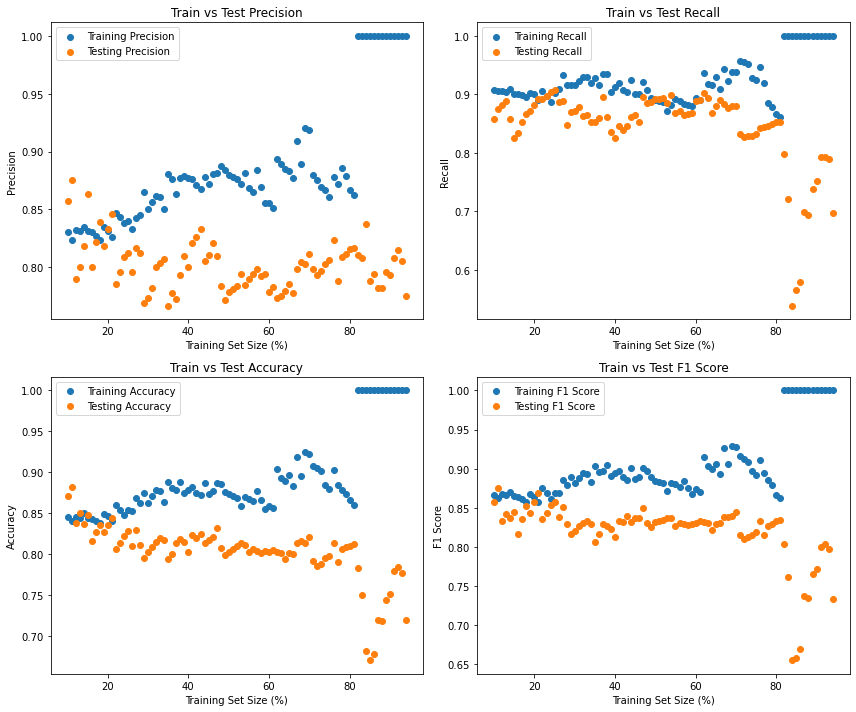

In [20]:
import matplotlib.pyplot as plt

# Train and test precision
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(list(range(10, 95)), training_precision, label='Training Precision')
plt.scatter(list(range(10, 95)), testing_precision, label='Testing Precision')
plt.title('Train vs Test Precision')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Precision')
plt.legend()

# Train and test recall
plt.subplot(2, 2, 2)
plt.scatter(list(range(10, 95)), training_recall, label='Training Recall')
plt.scatter(list(range(10, 95)), testing_recall, label='Testing Recall')
plt.title('Train vs Test Recall')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Recall')
plt.legend()

# Train and test accuracy
plt.subplot(2, 2, 3)
plt.scatter(list(range(10, 95)), training_accuracy, label='Training Accuracy')
plt.scatter(list(range(10, 95)), testing_accuracy, label='Testing Accuracy')
plt.title('Train vs Test Accuracy')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.legend()

# Train and test F1 score
plt.subplot(2, 2, 4)
plt.scatter(list(range(10, 95)), training_f1, label='Training F1 Score')
plt.scatter(list(range(10, 95)), testing_f1, label='Testing F1 Score')
plt.title('Train vs Test F1 Score')
plt.xlabel('Training Set Size (%)')
plt.ylabel('F1 Score')
plt.legend()

# Display all plots
plt.tight_layout()
plt.show()


In [ ]:
# Train and test recall

In [ ]:
# Train and test accuracy

In [ ]:
# Train and test F1 score

## Summary

Nice! In this lab, you calculated evaluation metrics for classification algorithms from scratch in Python. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.